# Use our own spectrogram data

In [82]:
from skimage import color
from skimage import io
from skimage.transform import resize
import os

In [89]:
def convert_img(filename, dst_folder):
  img = io.imread(filename)
  img_gray = color.rgb2gray(img)
  # io.imshow(img)
  # io.imshow(img_gray)

  img_gray = resize(img_gray, (256, 256))
  # io.imshow(img_gray)
  
  # io.imsave(f'./{dst_folder}/{filename}', img_gray)
  io.imsave(f'./{filename}', img_gray)

  return img_gray.flatten()

In [ ]:
arr = convert_img('test_mel.png', 'sample_data')
print(arr.shape)

In [62]:
# !git clone https://github.com/eayumba/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 5256, done.
remote: Counting objects: 100% (1528/1528), done.
remote: Compressing objects: 100% (1433/1433), done.
remote: Total 5256 (delta 103), reused 1517 (delta 94), pack-reused 3728
Receiving objects: 100% (5256/5256), 439.49 MiB | 21.73 MiB/s, done.
Resolving deltas: 100% (1719/1719), done.
Checking out files: 100% (3280/3280), done.


In [95]:
train_arr = np.zeros((1200, 256 ** 2))
test_arr = np.zeros((380, 256 ** 2))
train_cutoff = 600
test_cutoff = 190

# Add trainA images
counter = 0
for filename in os.listdir('./trainA'):
  if filename.endswith('.png'):
    if counter < train_cutoff:
      train_arr[counter] = convert_img(f'./trainA/{filename}', 'gray-A-train')
    else:
      test_arr[counter - train_cutoff] = convert_img(f'./trainA/{filename}', 'gray-A-test')
    counter += 1

# Add trainB images
for filename in os.listdir('./trainB'):
  if filename.endswith('.png'):
    if counter < (2 * train_cutoff + test_cutoff):
      train_arr[counter - test_cutoff] = convert_img(f'./trainB/{filename}', 'gray-B-train')
    else:
      test_arr[counter - 2 * train_cutoff] = convert_img(f'./trainB/{filename}', 'gray-B-test')
    counter += 1

In [108]:
train_labels = np.zeros(1200)
train_labels[len(train_labels)//2:] = 1

test_labels = np.zeros(380)
test_labels[len(test_labels)//2:] = 1

# Logistic Regression Classifier

In [ ]:
%matplotlib inline

ImportError: ignored

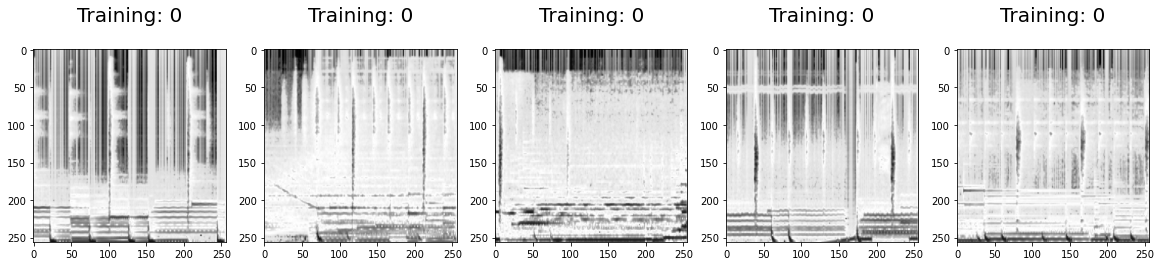

In [110]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_arr[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (256, 256)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Scikit-learn LogisticRegression


In [112]:
from sklearn.linear_model import LogisticRegression

In [117]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [118]:
logisticRegr.fit(train_arr, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Generate Predictions

In [121]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_arr[300].reshape(1,-1))

array([1.])

In [136]:
# Predict for Multiple Observations (images) at Once
print(logisticRegr.predict(test_arr[0:10]))
print(logisticRegr.predict_proba(test_arr[0:10]))
print(logisticRegr.predict_log_proba(test_arr[0:10]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[9.99999996e-01 4.05153857e-09]
 [9.98739499e-01 1.26050134e-03]
 [9.74786570e-01 2.52134302e-02]
 [9.97919319e-01 2.08068095e-03]
 [9.89666070e-01 1.03339297e-02]
 [9.99801399e-01 1.98600775e-04]
 [9.99968217e-01 3.17829123e-05]
 [9.99940358e-01 5.96418376e-05]
 [9.99830558e-01 1.69441969e-04]
 [9.99821628e-01 1.78371619e-04]]
[[-4.05153856e-09 -1.93241691e+01]
 [-1.26129644e-03 -6.67624575e+00]
 [-2.55367347e-02 -3.68037848e+00]
 [-2.08284857e-03 -6.17506006e+00]
 [-1.03876955e-02 -4.57232265e+00]
 [-1.98620498e-04 -8.52421391e+00]
 [-3.17834174e-05 -1.03565818e+01]
 [-5.96436162e-05 -9.72715326e+00]
 [-1.69456326e-04 -8.68300006e+00]
 [-1.78387529e-04 -8.63164144e+00]]


In [138]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_arr)
predictions_probs = logisticRegr.predict_proba(test_arr)

### Evaluation

accuracy is defined as: 

(fraction of correct predictions): correct predictions / total number of data points

In [124]:
score = logisticRegr.score(test_arr, test_labels)
print(score)

0.9368421052631579


### Display Misclassified images with Predicted Labels 

In [125]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_labels, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


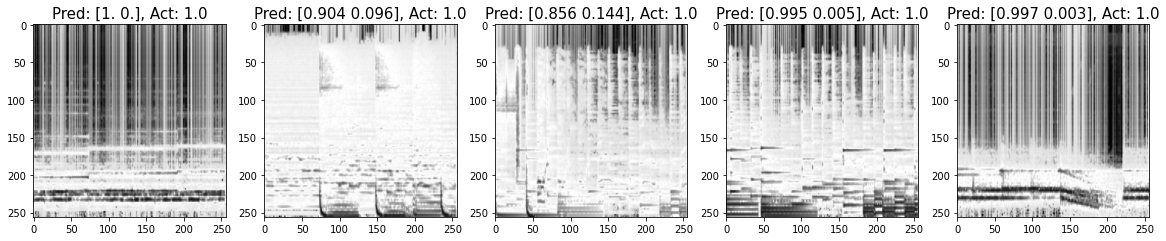

In [168]:
print(test_labels[misclassifiedIndexes])
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[5:10]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_arr[badIndex], (256, 256)), cmap=plt.cm.gray)
    # plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_arr[badIndex]), fontsize = 15)
    plt.title('Pred: {}, Act: {}'.format(np.round(predictions_probs[badIndex], 3), test_labels[badIndex]), fontsize = 15)